### problem 2: Finding the Most Targeted Region

In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme (style="darkgrid")
print(sklearn.__version__)  # This will print the version of scikit-learn installed


1.6.1


In [7]:
# Reading the newly created dataset for K-Means
df = pd.read_csv("kmeans_dataset.csv")

kmeans_dataset = df


# Pre modelling checks and final processing

In [ ]:
kmeans_dataset.head()

,target,launched,destroyed
0,NaN,1.0,1.0
1,NaN,1.0,1.0
2,Dnipro,1.0,0.0
3,NaN,1.0,1.0
4,NaN,2.0,2.0


In [11]:
len(kmeans_dataset)

1436

In [12]:
df.isnull().sum()


target       568
launched       0
destroyed      2
dtype: int64

Marking null values in target column as unkown for now

In [14]:
# Drop only 2 rows with missing destroyed values
df = df.dropna(subset=['destroyed'])

# Fill target NaNs with 'Unknown'
df.loc[:, 'target'] = df['target'].fillna('Unknown')



# Modeling K-Means

Version 1 making use of target launched and destroyed

In [22]:
# Aggregating the values first
region_stats = df.groupby('target')[['launched', 'destroyed']].sum().reset_index()

# Now each row in region_stats = 1 region with total launched/destroyed counts.

In [23]:
unknown_row = region_stats[region_stats['target'] == 'Unknown']
region_known = region_stats[region_stats['target'] != 'Unknown']


Feature scaling

In [24]:
scaler = StandardScaler()
X_known = scaler.fit_transform(region_known[['launched', 'destroyed']])

Initial clustering using 3 clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
region_known.loc[:, 'cluster'] = kmeans.fit_predict(X_known)

unknown_scaled = scaler.transform(unknown_row[['launched', 'destroyed']])

Analysing the cluster

In [29]:
# Average value per cluster
region_known.groupby('cluster')[['launched', 'destroyed']].mean()

# Viewing the full sorted cluster list
region_known.sort_values(by='destroyed', ascending=False)

,target,launched,destroyed,cluster
61,Odesa oblast,584.0,387.0,1
47,Kyiv oblast,357.0,339.0,1
37,Kherson oblast,225.0,190.0,2
53,Mykolaiv oblast,205.0,152.0,2
63,Odesa oblast and Mykolaiv oblast,163.0,119.0,2
...,...,...,...,...
72,"Poltava oblast, Myrhorod Raion",1.0,0.0,0
74,Starokostiantyniv,7.0,0.0,0
73,Snake Island,15.0,0.0,0
77,Sumy oblast and Kursk oblast,6.0,0.0,0


Visualisation

In [39]:
# Get top 10 most destroyed regions
top10 = region_known.sort_values(by='destroyed', ascending=False).head(6)


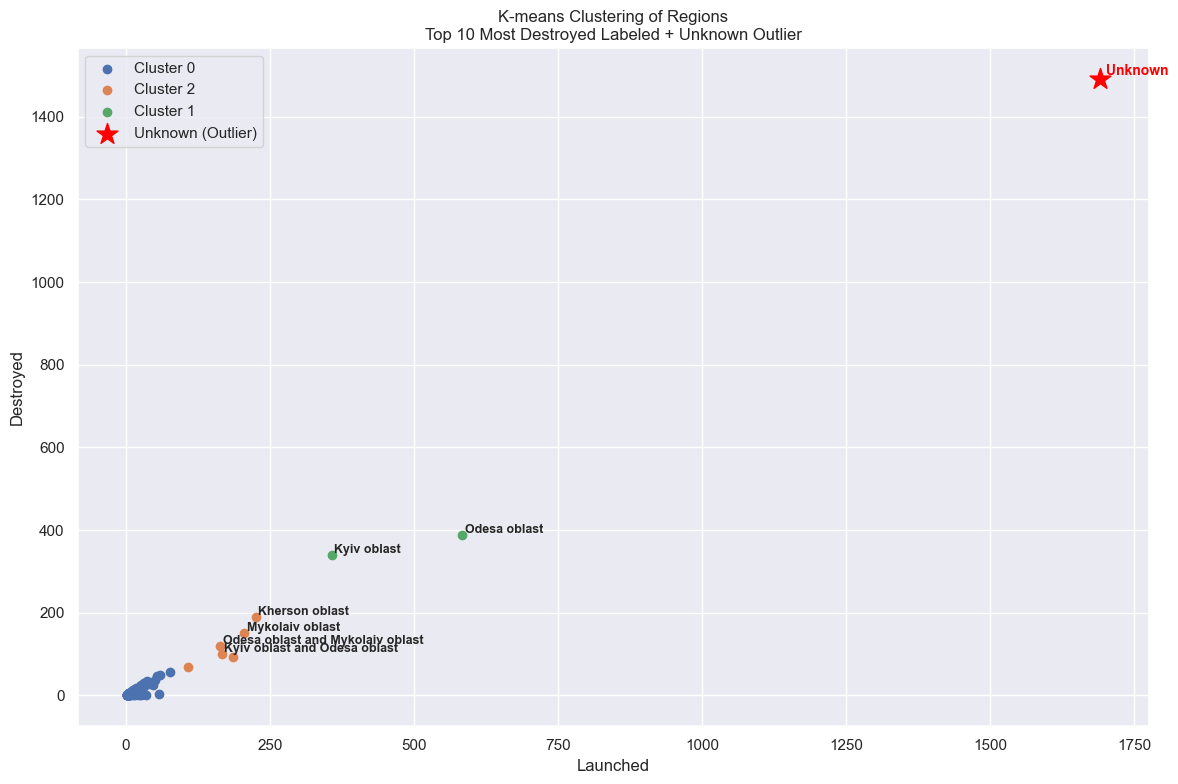

In [ ]:


plt.figure(figsize=(12, 8))

# Plot clusters
for cluster in region_known['cluster'].unique():
    subset = region_known[region_known['cluster'] == cluster]
    plt.scatter(subset['launched'], subset['destroyed'], label=f'Cluster {cluster}')

# Plot Unknown separately
plt.scatter(
    unknown_row['launched'], unknown_row['destroyed'],
    color='red', marker='*', s=250, label='Unknown (Outlier)'
)

# Label only the top 10 most destroyed regions
for _, row in top10.iterrows():
    plt.text(row['launched'] + 5, row['destroyed'] + 5, row['target'], fontsize=9, fontweight='bold')

# Label the Unknown point
plt.text(
    unknown_row['launched'].values[0] + 10,
    unknown_row['destroyed'].values[0] + 10,
    'Unknown',
    fontsize=10,
    color='red',
    fontweight='bold'
)

plt.xlabel('Launched')
plt.ylabel('Destroyed')
plt.title('K-means Clustering of Regions\nTop 10 Most Destroyed Labeled + Unknown Outlier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## V1 rough answer Odesa Oblast as most targeted region
*final K-Means graph of version 1 as 40% of the target column is NaN values I have used this version to show how this, in the next version I will try and improve the accuracy and use hot encoding for better results.*

Version 2 using hot encoding